In [21]:
import pandas as pd
wrapped=dict()

# Loading Database

In [22]:
streaming=pd.read_json('StreamingHistory0.json')
streaming
streaming['UniqueID'] = streaming['artistName'] + ":" + streaming['trackName']

In [23]:
pd.set_option('display.max_rows', False)
streaming

,endTime,artistName,trackName,msPlayed,UniqueID
0,2020-12-03 19:20,Leslie Odom Jr.,Stronger Magic,93573,Leslie Odom Jr.:Stronger Magic
1,2020-12-04 13:07,Leslie Odom Jr.,Stronger Magic,158918,Leslie Odom Jr.:Stronger Magic
2,2020-12-04 13:10,Frank Sinatra,I'm Gonna Live Till I Die,114760,Frank Sinatra:I'm Gonna Live Till I Die
3,2020-12-04 13:13,Sik World,7 Years (Remix),134197,Sik World:7 Years (Remix)
4,2020-12-04 13:16,G-Eazy,Still Be Friends (feat. Tory Lanez & Tyga),213307,G-Eazy:Still Be Friends (feat. Tory Lanez & Tyga)
5,2020-12-04 13:19,Lin-Manuel Miranda,"Aaron Burr, Sir",156630,"Lin-Manuel Miranda:Aaron Burr, Sir"
6,2020-12-04 13:25,Alexandre Desplat,"Traditional Arrangement: ""Moonshine""",398921,"Alexandre Desplat:Traditional Arrangement: ""Mo..."
7,2020-12-04 13:30,Travis Scott,HIGHEST IN THE ROOM,175720,Travis Scott:HIGHEST IN THE ROOM
8,2020-12-04 13:33,Anson Seabra,Welcome to Wonderland,199131,Anson Seabra:Welcome to Wonderland
...,...,...,...,...,...


# Getting most played song and seconds listened
<h1>Steps</h1>
<p>
    <ul>
    <li>Convert msPlayed to sPlayed because I find seconds easier to deal with</li>
    <br/>
    <li>Now the data is all messed up bc Spotify keeps a daily log of what you listen too. If you listen to a song more than once in a day (which TBF you probably do with your 'most listened to' song). So we need to clean it up and polish it to get what we need. Here are my steps:<br/>
        <ul>    
        <li>The msPlayed column had floats storing the ms you listened to a song. When we will later add up the entire 'sPlayed' column, if we add up integers we will get a different output compared to if we add up actual seconds. So we need to first convert the floats to seconds. This can be done using the 
        <pre>    pd.to_timedelta(streaming['sPlayed'],unit='s') </pre>
        function.
        </li>
        <br/>
        <li>Now that we have everything in the right units. We group all the similar names in 'trackName'column and get their 'sPlayed'. We add these 'sPlayed' up and sort them in descending fashion.This returns a series</li>
        </ul>
    </li>
    <li>That gives us our clean data. Once we get the series which has a list of all the songs we've heard and the time we've heard them. We convert the series to a dataframe to make it easier for us to access the data. Now using the loc function we can get the most played track and the time we've heard it.</li>
    </ul>
</p>

In [25]:
# Convert msplayed to splayed
def mstos(time):
    return time/1000

streaming['sPlayed']=streaming['msPlayed'].apply(lambda x: mstos(x))
del streaming['msPlayed']
streaming

,endTime,artistName,trackName,UniqueID,sPlayed
0,2020-12-03 19:20,Leslie Odom Jr.,Stronger Magic,Leslie Odom Jr.:Stronger Magic,93.573
1,2020-12-04 13:07,Leslie Odom Jr.,Stronger Magic,Leslie Odom Jr.:Stronger Magic,158.918
2,2020-12-04 13:10,Frank Sinatra,I'm Gonna Live Till I Die,Frank Sinatra:I'm Gonna Live Till I Die,114.760
3,2020-12-04 13:13,Sik World,7 Years (Remix),Sik World:7 Years (Remix),134.197
4,2020-12-04 13:16,G-Eazy,Still Be Friends (feat. Tory Lanez & Tyga),G-Eazy:Still Be Friends (feat. Tory Lanez & Tyga),213.307
5,2020-12-04 13:19,Lin-Manuel Miranda,"Aaron Burr, Sir","Lin-Manuel Miranda:Aaron Burr, Sir",156.630
6,2020-12-04 13:25,Alexandre Desplat,"Traditional Arrangement: ""Moonshine""","Alexandre Desplat:Traditional Arrangement: ""Mo...",398.921
7,2020-12-04 13:30,Travis Scott,HIGHEST IN THE ROOM,Travis Scott:HIGHEST IN THE ROOM,175.720
8,2020-12-04 13:33,Anson Seabra,Welcome to Wonderland,Anson Seabra:Welcome to Wonderland,199.131
...,...,...,...,...,...


In [26]:
# Sorting based by the day and show the song i played the most that day
streaming.sort_values(by=['endTime','sPlayed'],ascending=False,inplace=True)
# Sorting by seconds played
# streaming.sort_values(by=['sPlayed'],ascending=False)

# # Convert float to time 
# streaming['sPlayed']=pd.to_timedelta(streaming['sPlayed'],unit='s')
streaming.head(10)

,endTime,artistName,trackName,UniqueID,sPlayed
8089,2021-12-04 21:32,A.R. Rahman,The Humma Song,A.R. Rahman:The Humma Song,170.368
8088,2021-12-04 21:32,Payal Dev,"Tum Hi Aana (From ""Marjaavaan"")","Payal Dev:Tum Hi Aana (From ""Marjaavaan"")",7.018
8087,2021-12-04 21:29,Arijit Singh,"Ghungroo (From ""War"")","Arijit Singh:Ghungroo (From ""War"")",78.431
8083,2021-12-04 21:29,Tanishk Bagchi,Makhna,Tanishk Bagchi:Makhna,1.589
8082,2021-12-04 21:29,Jasmine Sandlas,"Illegal Weapon 2.0 (From ""Street Dancer 3D"")","Jasmine Sandlas:Illegal Weapon 2.0 (From ""Stre...",0.821
8081,2021-12-04 21:29,Pritam,Shayad,Pritam:Shayad,0.629
8085,2021-12-04 21:29,B Praak,"Mann Bharryaa 2.0 (From ""Shershaah"")","B Praak:Mann Bharryaa 2.0 (From ""Shershaah"")",0.607
8084,2021-12-04 21:29,Sachin-Jigar,"Chandigarh Kare Aashiqui Title Track (From ""Ch...",Sachin-Jigar:Chandigarh Kare Aashiqui Title Tr...,0.000
8086,2021-12-04 21:29,Javed-Mohsin,Kabhii Tumhhe,Javed-Mohsin:Kabhii Tumhhe,0.000
8078,2021-12-04 21:27,Jasleen Royal,Din Shagna Da,Jasleen Royal:Din Shagna Da,130.069


In [27]:
# Get the most listened to track
# Next statement groups the track by their tracknames and then adds up all the seconds played. After that it sorts the values in a descending order
s1=streaming.groupby('trackName')['sPlayed'].sum().sort_values(ascending=False)
# We now convert the series object we got in the previous line to a dataframe so we can easily pinpoint and get the most listened to track.
totalTracks=pd.DataFrame({'trackName':s1.index,'timeListened':s1.values})

In [28]:
# Found most heard song
wrapped['mostHeardSong']=totalTracks.loc[0].trackName
wrapped['timeHeardSong']=totalTracks.loc[0].timeListened
wrapped

{'mostHeardSong': 'Pancakes for Dinner', 'timeHeardSong': 20828.32}

In [29]:
totalTracks=totalTracks.sort_values(['trackName'])

---------------------------------------------------------------------------------------------------------------------------------------------

# Getting most played artist and seconds listened

In [30]:
streaming

,endTime,artistName,trackName,UniqueID,sPlayed
8089,2021-12-04 21:32,A.R. Rahman,The Humma Song,A.R. Rahman:The Humma Song,170.368
8088,2021-12-04 21:32,Payal Dev,"Tum Hi Aana (From ""Marjaavaan"")","Payal Dev:Tum Hi Aana (From ""Marjaavaan"")",7.018
8087,2021-12-04 21:29,Arijit Singh,"Ghungroo (From ""War"")","Arijit Singh:Ghungroo (From ""War"")",78.431
8083,2021-12-04 21:29,Tanishk Bagchi,Makhna,Tanishk Bagchi:Makhna,1.589
8082,2021-12-04 21:29,Jasmine Sandlas,"Illegal Weapon 2.0 (From ""Street Dancer 3D"")","Jasmine Sandlas:Illegal Weapon 2.0 (From ""Stre...",0.821
8081,2021-12-04 21:29,Pritam,Shayad,Pritam:Shayad,0.629
8085,2021-12-04 21:29,B Praak,"Mann Bharryaa 2.0 (From ""Shershaah"")","B Praak:Mann Bharryaa 2.0 (From ""Shershaah"")",0.607
8084,2021-12-04 21:29,Sachin-Jigar,"Chandigarh Kare Aashiqui Title Track (From ""Ch...",Sachin-Jigar:Chandigarh Kare Aashiqui Title Tr...,0.000
8086,2021-12-04 21:29,Javed-Mohsin,Kabhii Tumhhe,Javed-Mohsin:Kabhii Tumhhe,0.000
...,...,...,...,...,...


In [31]:
# Get the most listened to track
# Next statement groups the track by their tracknames and then adds up all the seconds played. After that it sorts the values in a descending order
s1=streaming.groupby('artistName')['sPlayed'].sum().sort_values(ascending=False)
# We now convert the series object we got in the previous line to a dataframe so we can easily pinpoint and get the most listened to track.
totalArtists=pd.DataFrame({'artistName':s1.index,'timeListened':s1.values})
totalArtists

,artistName,timeListened
0,Ben Platt,75579.257
1,FINNEAS,64537.659
2,AJR,52924.148
3,Ritviz,46392.902
4,Taylor Swift,41543.229
5,Ashe,27715.781
6,Ed Sheeran,24882.072
7,The Lumineers,23615.706
8,Alec Benjamin,23536.265
...,...,...


In [32]:
wrapped['mostHeardArtist']=totalArtists.loc[0].artistName
wrapped['timeHeardArtist']=totalArtists.loc[0].timeListened
wrapped

{'mostHeardSong': 'Pancakes for Dinner',
 'timeHeardSong': 20828.32,
 'mostHeardArtist': 'Ben Platt',
 'timeHeardArtist': 75579.257}

# Time listened in every month

In [33]:
import calendar
streaming['month']=streaming['endTime'].str[5:7]
streaming['month']=pd.to_datetime(streaming['month'], format='%m').dt.month_name().str.slice(stop=3)
streaming.head()

,endTime,artistName,trackName,UniqueID,sPlayed,month
8089,2021-12-04 21:32,A.R. Rahman,The Humma Song,A.R. Rahman:The Humma Song,170.368,Dec
8088,2021-12-04 21:32,Payal Dev,"Tum Hi Aana (From ""Marjaavaan"")","Payal Dev:Tum Hi Aana (From ""Marjaavaan"")",7.018,Dec
8087,2021-12-04 21:29,Arijit Singh,"Ghungroo (From ""War"")","Arijit Singh:Ghungroo (From ""War"")",78.431,Dec
8083,2021-12-04 21:29,Tanishk Bagchi,Makhna,Tanishk Bagchi:Makhna,1.589,Dec
8082,2021-12-04 21:29,Jasmine Sandlas,"Illegal Weapon 2.0 (From ""Street Dancer 3D"")","Jasmine Sandlas:Illegal Weapon 2.0 (From ""Stre...",0.821,Dec


In [34]:
s1=streaming.groupby('month')['sPlayed'].sum()
months=pd.DataFrame({'month':s1.index,'timeListened':s1.values})
months

,month,timeListened
0,Apr,91276.647
1,Aug,98863.806
2,Dec,164081.538
3,Feb,107662.822
4,Jan,135794.768
5,Jul,89544.003
6,Jun,68968.049
7,Mar,61286.619
8,May,65702.885
9,Nov,108012.090


# Based on time of day

In [35]:
streaming['hour']=streaming['endTime'].str[11:13]
h1=streaming.groupby('hour')['sPlayed'].sum()
hours=pd.DataFrame({'hour':h1.index,'timeListened':h1.values})
hours

,hour,timeListened
0,00,1857.666
1,01,2908.315
2,02,551.475
3,03,10066.621
4,04,31422.372
5,05,53448.904
6,06,71989.310
7,07,82723.236
8,08,65636.013
...,...,...


# Visualizations

In [36]:
totalArtists=totalArtists.sort_values(by='artistName',ascending=False)
totalArtists

,artistName,timeListened
396,sleep.ing,119.288
79,salem ilese,3786.238
59,mxmtoon,5465.356
332,mt. fujitive,189.240
571,mehro,1.500
449,lovelytheband,53.571
594,khai dreams,0.170
395,itssvd,120.546
93,ilyTOMMY,3326.757
...,...,...


/Applications/anaconda3/envs/spotify/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22826 (\N{CJK UNIFIED IDEOGRAPH-592A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/envs/spotify/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38525 (\N{CJK UNIFIED IDEOGRAPH-967D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/envs/spotify/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12373 (\N{HIRAGANA LETTER SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Applications/anaconda3/envs/spotify/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12435 (\N{HIRAGANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


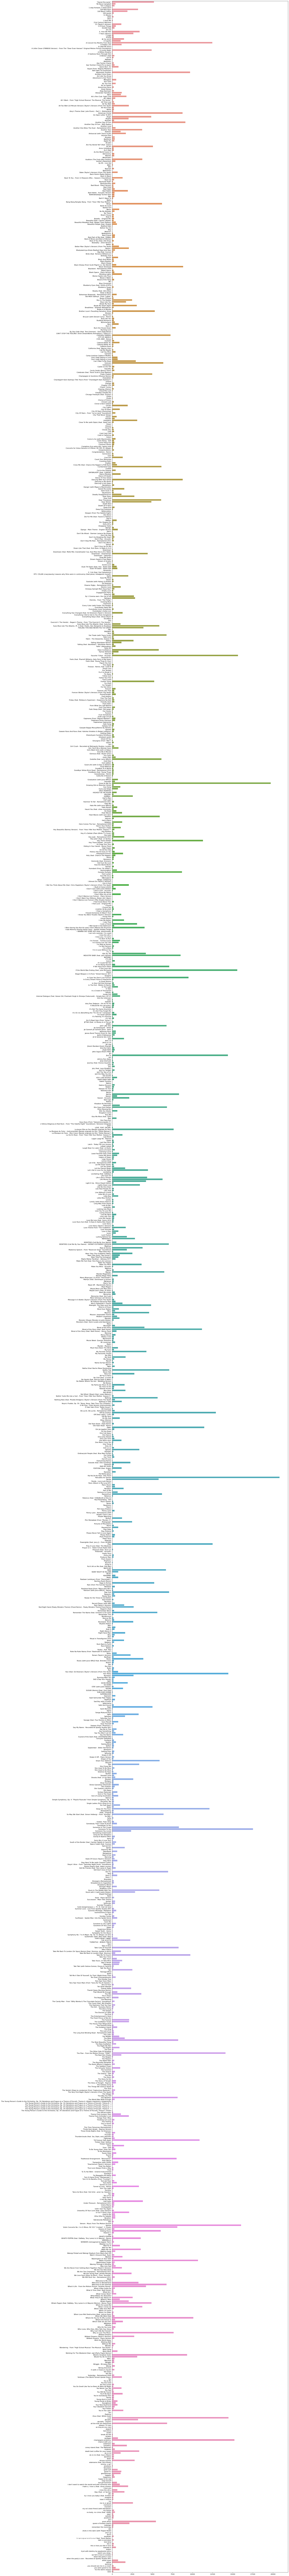

In [37]:
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(num=None,figsize=(20,300),dpi=80)
sns.barplot(x=totalTracks['timeListened'].to_list(),y=totalTracks['trackName'].to_list())
plt.show()

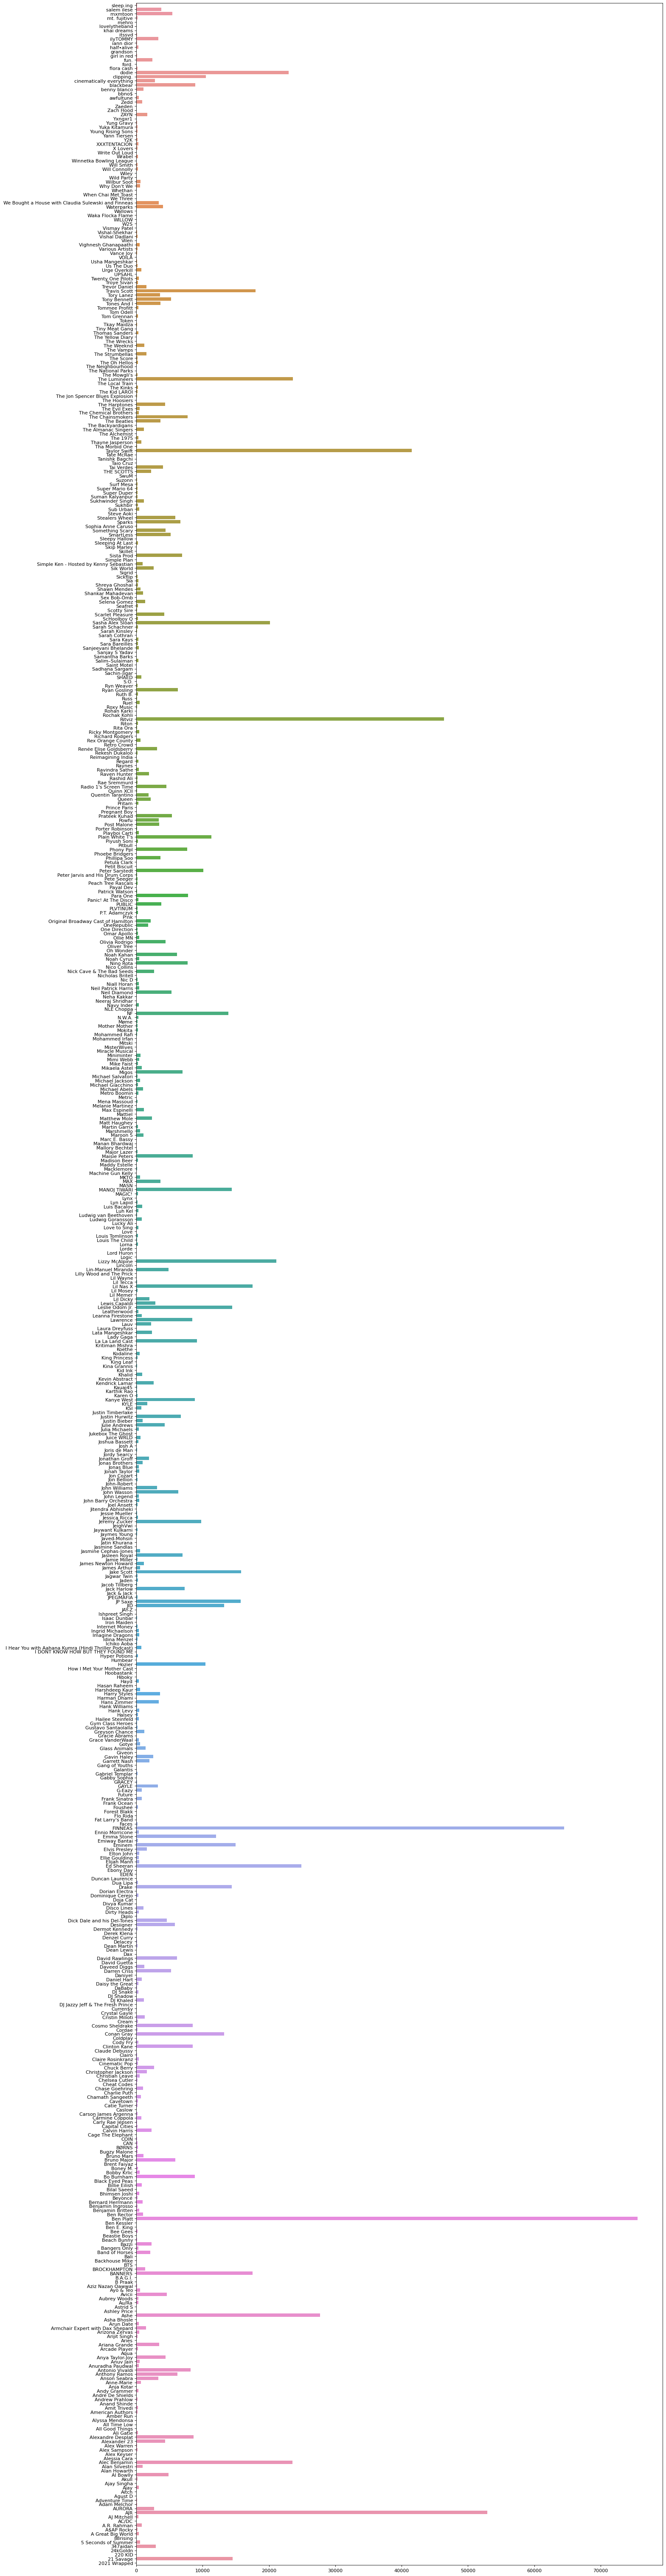

In [38]:
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(num=None,figsize=(20,100),dpi=80)
sns.barplot(x=totalArtists['timeListened'].to_list(),y=totalArtists['artistName'].to_list())
plt.show()

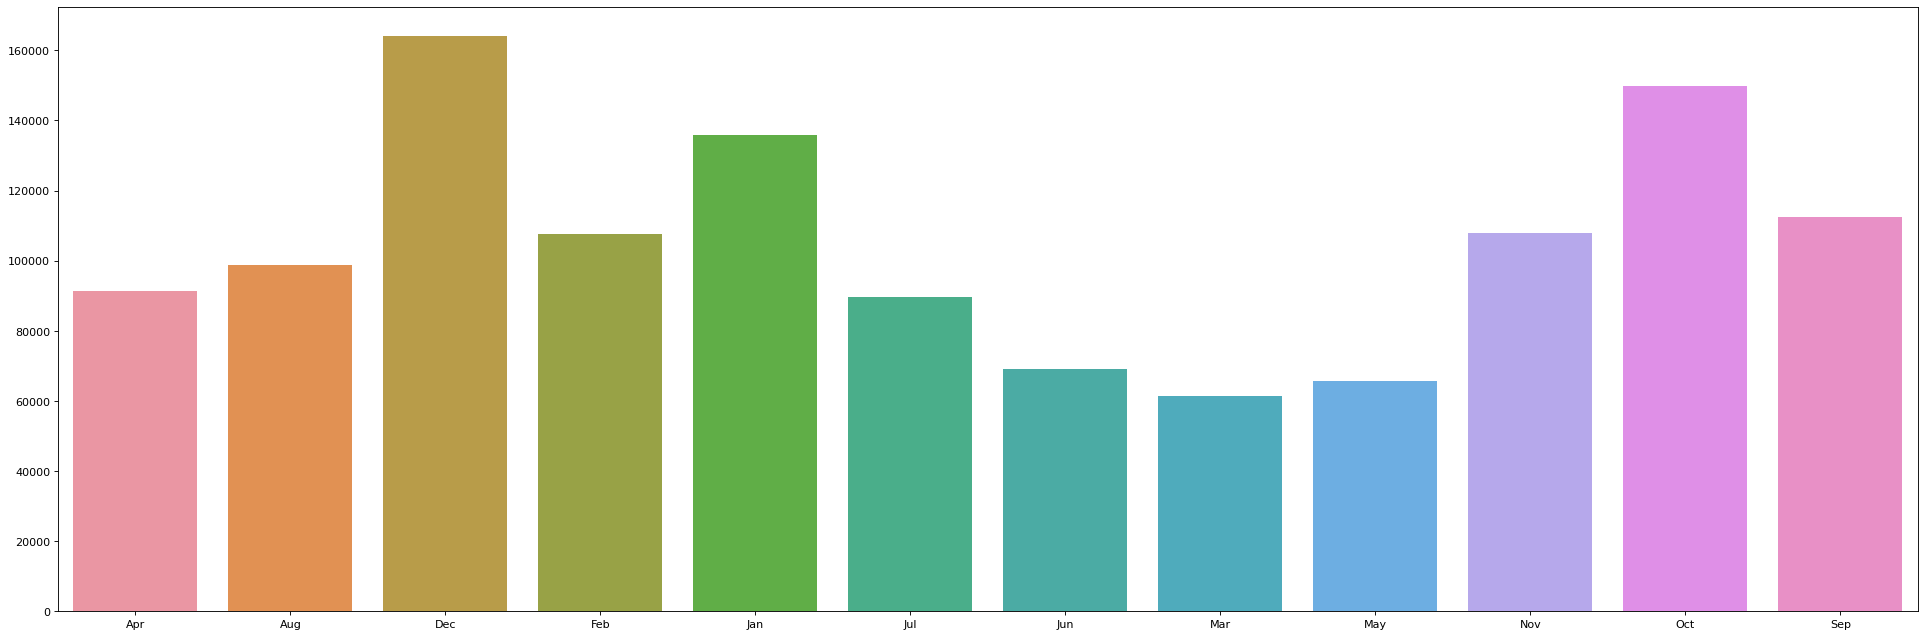

In [39]:
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(num=None,figsize=(30,10),dpi=80)
sns.barplot(x=months['month'].to_list(),y=months['timeListened'].to_list())
plt.show()

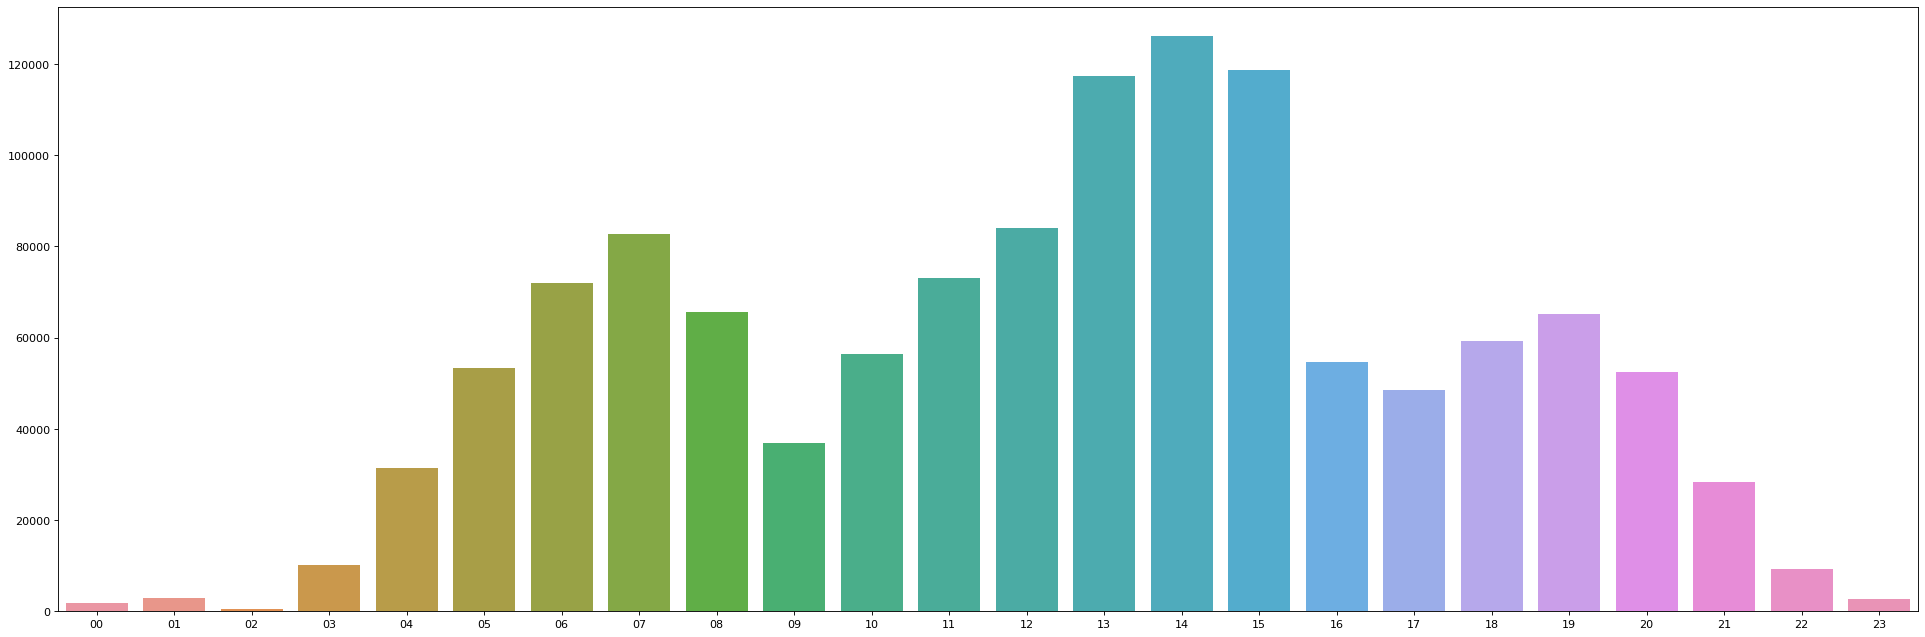

In [40]:
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(num=None,figsize=(30,10),dpi=80)
sns.barplot(x=hours['hour'].to_list(),ay=hours['timeListened'].to_list())
plt.show()